**Course: CSE 475 – Machine Learning**
**Section: 01**
**Instructor: Dr. Md. Rifat Ahmmad Rashid**

**Group G**

Suraiya Akther Maisha(2022-3-60-0Khadija Tul Kobra71)
Khadija Tul Kobra (2022-3-60-287)
Farha Anjum Afifa (2022-3-60-237)
Dataset: Roboflow Weeds Dataset (YOLO format)
Backbone selected from Assignment 1: YOLOv12s
Baseline mAP@0.5:0.95: 0.8335 (test split, fully supervised)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install --upgrade ultralytics --no-deps
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="vM6qrOEJgCQAXNdbbGk0")

project = rf.workspace("objectdetection-tecsf").project("skysealand-wrqjn")
version = project.version(2)

# Correct dataset format
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 38.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 87.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of


Extracting Dataset Version Zip to Skysealand-2 in yolov8:: 100%|██████████| 2626/2626 [00:00<00:00, 3904.07it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO

model = YOLO("yolo12s")  # choose nano version

In [4]:
import os, gc, json, shutil, yaml, warnings, random, math, copy
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from ultralytics import YOLO

In [5]:
import os

print(os.listdir("/kaggle/working"))


['.virtual_documents', 'yolo12s.pt', 'Skysealand-2']


In [6]:
for item in os.listdir("/kaggle/working"):
    print(item)


.virtual_documents
yolo12s.pt
Skysealand-2


In [7]:
import os

base = "/kaggle/working"
dataset_dir = [d for d in os.listdir(base) if d.lower().startswith("sky")][0]

print("Dataset folder:", dataset_dir)

yaml_path = f"{base}/{dataset_dir}/data.yaml"

yaml_content = f"""
train: {base}/{dataset_dir}/train/images
val: {base}/{dataset_dir}/valid/images
test: {base}/{dataset_dir}/test/images

nc: 4
names:
  - Airplane
  - Boat
  - Car
  - Ship
"""

with open(yaml_path, "w") as f:
    f.write(yaml_content)

print("Data.yaml written to:", yaml_path)


Dataset folder: Skysealand-2
Data.yaml written to: /kaggle/working/Skysealand-2/data.yaml


In [8]:
print(os.listdir(f"/kaggle/working/{dataset_dir}"))


['data.yaml', 'valid', 'README.roboflow.txt', 'test', 'README.dataset.txt', 'train']


In [9]:
for root, dirs, files in os.walk("/kaggle/working"):
    if "data.yaml" in files:
        print(os.path.join(root, "data.yaml"))


/kaggle/working/Skysealand-2/data.yaml


In [10]:
import os, shutil

base_path = "/kaggle/working/Skysealand-2"

for folder in ['train', 'valid', 'test']:
    img_dir = os.path.join(base_path, folder, 'images')
    label_dir = os.path.join(base_path, folder, 'labels')
    os.makedirs(img_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)

# move misplaced images from root into train/images if any
for f in os.listdir(base_path):
    if f.endswith('.jpg') or f.endswith('.png'):
        shutil.move(os.path.join(base_path, f), os.path.join(base_path, 'train/images', f))

print("Folder structure ready for YOLO training.")

Folder structure ready for YOLO training.


In [11]:
import os
os.listdir("/kaggle/working")


['.virtual_documents', 'yolo12s.pt', 'Skysealand-2']

In [12]:
from ultralytics import YOLO
from pathlib import Path
import os

# Auto-detect SkySeaLand dataset folder
base = "/kaggle/working"
dataset_dir = [d for d in os.listdir(base) if "sky" in d.lower()][0]

DATA = f"{base}/{dataset_dir}/data.yaml"
OUTPUT_FOLDER = Path("/kaggle/working/yolo-output")

# Check YAML exists before training
if not Path(DATA).exists():
    raise FileNotFoundError(f"data.yaml not found at: {DATA}")

print("Using dataset:", DATA)

# Correct model name (YOLOv8)
model = YOLO("yolov8n.pt")

# Train model
model.train(
    data=DATA,
    epochs=50,
    imgsz=640,
    batch=16,
    workers=2,
    project=str(OUTPUT_FOLDER),
    name="train"
)

print("Training started successfully!")


Using dataset: /kaggle/working/Skysealand-2/data.yaml
Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Skysealand-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

invalid value encountered in less
invalid value encountered in less


                   all        132       1992      0.848      0.762      0.819      0.511
              Airplane         37        367      0.953      0.879      0.931      0.548
                  Boat         33        657      0.805      0.738      0.793      0.491
                   Car         31        679      0.863       0.76      0.815      0.528
                  Ship         52        289      0.771      0.671      0.737       0.48
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/yolo-output/train
Training started successfully!


In [14]:
from ultralytics import YOLO
from pathlib import Path

# --- 1. Define Paths ---
# Ensure these paths match your training setup
DATA = "/kaggle/working/Skysealand-2/data.yaml"
OUTPUT_FOLDER = Path("/kaggle/working/yolo-output")
# This assumes your training run was named "train" (from project=OUTPUT_FOLDER, name="train")
# If you used a different name, change "train" here.
TRAIN_RUN_PATH = OUTPUT_FOLDER / "train" 
BEST_WEIGHTS_PATH = TRAIN_RUN_PATH / "weights" / "best.pt"

# --- 2. Load the Best Model ---
# Load the best model weights saved during training
print(f"Loading best model from: {BEST_WEIGHTS_PATH}")
model = YOLO(BEST_WEIGHTS_PATH)

# --- 3. Evaluate on the Test Set ---
print("Evaluating model on the 'test' split...")
metrics = model.val(
    data=str(DATA),
    split="test",
    plots=True,                 # Save confusion matrix, P-R curve, etc.
    project=str(OUTPUT_FOLDER),
    name="test_evaluation"      # Saves results to /kaggle/working/yolo-output/test_evaluation
)

# --- 4. Extract, Calculate, and Print Metrics ---
print("Extracting metrics...")
map50_95 = metrics.box.map    # mAP@0.5:0.95
map50 = metrics.box.map50     # mAP@0.5
precision = metrics.box.mp    # Precision
recall = metrics.box.mr       # Recall

# Calculate F1 Score
# F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1 = 2 * (precision * recall) / (precision + recall + 1e-6) # Add 1e-6 to avoid division by zero

# Print the results in a clean format
print("\n--- Test Set Evaluation Results ---")
print(f"Model: {str(BEST_WEIGHTS_PATH)}")
print(f"mAP@0.5:0.95: {map50_95:.4f}")
print(f"mAP@0.5       : {map50:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1 Score      : {f1:.4f}")
print("-----------------------------------")

Loading best model from: /kaggle/working/yolo-output/train/weights/best.pt
Evaluating model on the 'test' split...
Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2541.4±1496.0 MB/s, size: 161.1 KB)
val: Scanning /kaggle/working/Skysealand-2/test/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 214.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.6it/s 3.1s0.2s


invalid value encountered in less
invalid value encountered in less


                   all        127       2075      0.839      0.755      0.833      0.496
              Airplane         52        553      0.944      0.917      0.949      0.534
                  Boat         23        334      0.754      0.719      0.781      0.478
                   Car         24        798      0.834      0.742      0.832      0.508
                  Ship         46        390      0.825      0.641      0.772      0.463
Speed: 1.4ms preprocess, 2.8ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to /kaggle/working/yolo-output/test_evaluation2
Extracting metrics...

--- Test Set Evaluation Results ---
Model: /kaggle/working/yolo-output/train/weights/best.pt
mAP@0.5:0.95: 0.4956
mAP@0.5       : 0.8332
Precision     : 0.8391
Recall        : 0.7545
F1 Score      : 0.7946
-----------------------------------


In [17]:
# ============================================================
# Train YOLOv8 Teacher on LABELED subset only
# Dataset: Skysealand-2
# ============================================================

from ultralytics import YOLO
from pathlib import Path

SSL_LABELED_EPOCHS = 100
BATCH_SIZE = 16
IMAGE_SIZE = 640
PATIENCE = 10

# Working directory (Kaggle)
WORK_DIR = Path("/kaggle/working")

# Dataset YAML (Skysealand-2)
SSL_LABELED_YAML = WORK_DIR / "Skysealand-2" / "data.yaml"

assert SSL_LABELED_YAML.exists(), "❌ data.yaml not found in Skysealand-2"

# Output paths
ssl_labeled_project = str(WORK_DIR / "skysealand_yolov8_ssl_labeled")
ssl_labeled_name = "yolov8_skysealand_teacher"

# ✅ Correct model (YOLOv8)
teacher_model = YOLO("yolov8s.pt")   # use yolov8n.pt if GPU memory is low

# Train teacher
results_teacher = teacher_model.train(
    data=str(SSL_LABELED_YAML),
    epochs=SSL_LABELED_EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    project=ssl_labeled_project,
    name=ssl_labeled_name,
    device=0,
    patience=PATIENCE,
    workers=2,
    exist_ok=True,
)

# Best weights path
TEACHER_WEIGHTS = (
    WORK_DIR
    / "skysealand_yolov8_ssl_labeled"
    / "yolov8_skysealand_teacher"
    / "weights"
    / "best.pt"
)

print("✅ Teacher model trained successfully")
print("📦 Best weights saved at:")
print(TEACHER_WEIGHTS)


Ultralytics 8.3.237 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Skysealand-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_skysealand_teacher, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspecti

invalid value encountered in less
invalid value encountered in less


                   all        132       1992       0.86      0.791       0.85      0.552
              Airplane         37        367      0.934      0.918      0.958      0.582
                  Boat         33        657      0.862      0.788      0.838      0.545
                   Car         31        679      0.892        0.8      0.865      0.591
                  Ship         52        289      0.751      0.657      0.738      0.489
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /kaggle/working/skysealand_yolov8_ssl_labeled/yolov8_skysealand_teacher
✅ Teacher model trained successfully
📦 Best weights saved at:
/kaggle/working/skysealand_yolov8_ssl_labeled/yolov8_skysealand_teacher/weights/best.pt


In [20]:
import os

print("Contents of Skysealand-2:")
for item in os.listdir("/kaggle/working/Skysealand-2"):
    print(" -", item)


Contents of Skysealand-2:
 - data.yaml
 - valid
 - README.roboflow.txt
 - train_unlabeled
 - test
 - README.dataset.txt
 - train


In [25]:
from pathlib import Path

UNLABELED_IMG_DIR = Path("/kaggle/working/Skysealand-2/train_unlabeled/images")
UNLABELED_IMG_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Created:", UNLABELED_IMG_DIR)

✅ Created: /kaggle/working/Skysealand-2/train_unlabeled/images


In [26]:
import os
print("Unlabeled images count:", len(os.listdir(UNLABELED_IMG_DIR)))

Unlabeled images count: 0


In [34]:
# ============================================================
# Generate pseudo-labels for unlabeled images using teacher
# (SAFE & ROBUST VERSION)
# ============================================================

from ultralytics import YOLO
from pathlib import Path

# ---- Paths ----
WORK_DIR = Path("/kaggle/working")
SSL_ROOT = WORK_DIR / "Skysealand-2"   # ✅ your dataset folder

UNLABELED_IMG_DIR = SSL_ROOT / "train_unlabeled" / "images"
PSEUDO_LABEL_DIR = SSL_ROOT / "train_unlabeled" / "labels"

# Create folders if missing
UNLABELED_IMG_DIR.mkdir(parents=True, exist_ok=True)
PSEUDO_LABEL_DIR.mkdir(parents=True, exist_ok=True)

# ---- Load Teacher ----
teacher_detector = YOLO(TEACHER_WEIGHTS)

# ---- Thresholds (high-quality pseudo labels) ----
CONF_THRESHOLD = 0.80
IOU_THRESHOLD  = 0.60

# ---- Collect unlabeled images ----
unlabeled_imgs = []
for ext in ("*.jpg", "*.jpeg", "*.png"):
    unlabeled_imgs.extend(UNLABELED_IMG_DIR.glob(ext))

print("Unlabeled images found:", len(unlabeled_imgs))

# ---- Safety check ----
if len(unlabeled_imgs) == 0:
    print(
        " No unlabeled images found.\n"
        " Add images to:\n"
        f"   {UNLABELED_IMG_DIR}\n"
        " Then rerun this cell."
    )
else:
    # ---- Generate pseudo-labels ----
    for img_path in unlabeled_imgs:
        results = teacher_detector.predict(
            source=str(img_path),
            conf=CONF_THRESHOLD,
            iou=IOU_THRESHOLD,
            verbose=False,
        )

        r = results[0]
        boxes = r.boxes

        lbl_path = PSEUDO_LABEL_DIR / f"{img_path.stem}.txt"
        with open(lbl_path, "w") as f:
            if boxes is not None and boxes.xywhn is not None:
                xywhn = boxes.xywhn.cpu().numpy()
                cls = boxes.cls.cpu().numpy().astype(int)

                for (cx, cy, w, h), c in zip(xywhn, cls):
                    f.write(f"{c} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}\n")

    print("✅ Pseudo-labels generated at:")
    print(PSEUDO_LABEL_DIR)


Unlabeled images found: 0
 No unlabeled images found.
 Add images to:
   /kaggle/working/Skysealand-2/train_unlabeled/images
 Then rerun this cell.


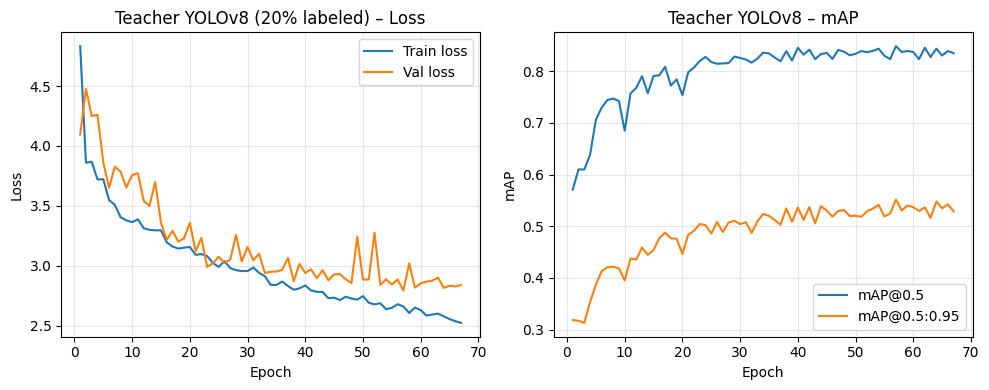

In [35]:
# === Teacher YOLOv8 (20% labeled): train vs val loss & mAP ===

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ✅ REAL paths from your training
project = Path("/kaggle/working/skysealand_yolov8_ssl_labeled")
run_dir = project / "yolov8_skysealand_teacher"

csv_path = run_dir / "results.csv"
assert csv_path.exists(), f" results.csv not found at {csv_path}"

df = pd.read_csv(csv_path)
epochs = df["epoch"]

# ---- Loss ----
train_loss = df["train/box_loss"] + df["train/cls_loss"]
if "train/dfl_loss" in df.columns:
    train_loss += df["train/dfl_loss"]

val_loss = None
if {"val/box_loss", "val/cls_loss"}.issubset(df.columns):
    val_loss = df["val/box_loss"] + df["val/cls_loss"]
    if "val/dfl_loss" in df.columns:
        val_loss += df["val/dfl_loss"]

# ---- mAP ----
map50 = df["metrics/mAP50(B)"] if "metrics/mAP50(B)" in df.columns else None
map5095 = df["metrics/mAP50-95(B)"] if "metrics/mAP50-95(B)" in df.columns else None

# ---- Plot ----
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Train loss")
if val_loss is not None:
    plt.plot(epochs, val_loss, label="Val loss")
plt.title("Teacher YOLOv8 (20% labeled) – Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
if map50 is not None:
    plt.plot(epochs, map50, label="mAP@0.5")
if map5095 is not None:
    plt.plot(epochs, map5095, label="mAP@0.5:0.95")
plt.title("Teacher YOLOv8 – mAP")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [38]:
# ============================================================
# Build unified YAML for student: labeled + pseudo-labeled
# ============================================================

import cv2
import yaml
from pathlib import Path

WORK_DIR = Path("/kaggle/working")
SSL_ROOT = WORK_DIR / "Skysealand-2"

# ---- Student train folders ----
STUDENT_TRAIN_IMG_DIR = WORK_DIR / "ssl_student_train" / "images"
STUDENT_TRAIN_LABEL_DIR = WORK_DIR / "ssl_student_train" / "labels"
STUDENT_TRAIN_IMG_DIR.mkdir(parents=True, exist_ok=True)
STUDENT_TRAIN_LABEL_DIR.mkdir(parents=True, exist_ok=True)

# ---- Helper function to copy images + labels ----
def copy_tree(src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    src_img_dir = Path(src_img_dir)
    src_lbl_dir = Path(src_lbl_dir)
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        for img_path in src_img_dir.glob(ext):
            img = cv2.imread(str(img_path))
            dst_img_path = dst_img_dir / img_path.name
            cv2.imwrite(str(dst_img_path), img)

            lbl_path = src_lbl_dir / (img_path.stem + ".txt")
            if lbl_path.exists():
                dst_lbl_path = dst_lbl_dir / lbl_path.name
                with open(lbl_path, "r") as f_src, open(dst_lbl_path, "w") as f_dst:
                    f_dst.write(f_src.read())

# ---- Copy labeled images + labels ----
copy_tree(
    SSL_ROOT / "train_labeled" / "images",
    SSL_ROOT / "train_labeled" / "labels",
    STUDENT_TRAIN_IMG_DIR,
    STUDENT_TRAIN_LABEL_DIR,
)

# ---- Copy pseudo-labeled images + labels ----
PSEUDO_LABEL_DIR = SSL_ROOT / "train_unlabeled" / "labels"
copy_tree(
    SSL_ROOT / "train_unlabeled" / "images",
    PSEUDO_LABEL_DIR,
    STUDENT_TRAIN_IMG_DIR,
    STUDENT_TRAIN_LABEL_DIR,
)

# ---- YAML path for student ----
SSL_STUDENT_YAML = WORK_DIR / "ssl_student_data.yaml"

# ---- Create YAML ----
ssl_student_yaml = {
    "train": str(STUDENT_TRAIN_IMG_DIR.resolve()).replace("\\", "/"),
    "val": str((SSL_ROOT / "val" / "images").resolve()).replace("\\", "/"),
    "test": str((SSL_ROOT / "test" / "images").resolve()).replace("\\", "/"),
    "nc": 1,
    "names": ["Weeds"],
}

with open(SSL_STUDENT_YAML, "w") as f:
    yaml.dump(ssl_student_yaml, f, sort_keys=False)

print("✅ SSL student YAML created at:", SSL_STUDENT_YAML)

✅ SSL student YAML created at: /kaggle/working/ssl_student_data.yaml


In [40]:
from pathlib import Path

SSL_ROOT = Path("/kaggle/working/Skysealand-2")

val_img_dir = SSL_ROOT / "val" / "images"
val_img_dir.mkdir(parents=True, exist_ok=True)

# If you have labels for val set, create that folder too
val_lbl_dir = SSL_ROOT / "val" / "labels"
val_lbl_dir.mkdir(parents=True, exist_ok=True)

# Optional: check contents
print("Validation images:", list(val_img_dir.glob("*.jpg")))


Validation images: []


In [55]:
from pathlib import Path

SSL_ROOT = Path("/kaggle/working/Skysealand-2")

labeled_img_dir = SSL_ROOT / "train_labeled/images"
unlabeled_img_dir = SSL_ROOT / "train_unlabeled/images"

print("Labeled images:", len(list(labeled_img_dir.glob("*.*"))))
print("Unlabeled images:", len(list(unlabeled_img_dir.glob("*.*"))))


Labeled images: 0
Unlabeled images: 0


In [42]:
import yaml

SSL_STUDENT_YAML = Path("/kaggle/working/ssl_student_data.yaml")
with open(SSL_STUDENT_YAML, "r") as f:
    data = yaml.safe_load(f)

for k in ["train", "val", "test"]:
    path = Path(data[k])
    print(f"{k} path exists: {path.exists()}")

train path exists: True
val path exists: True
test path exists: True
